**Q 1. Make sure that you are using the data that you created for Assignment 3. This table must have 7 columns.**

• Develop a Linear Regression based model where electronegativity is X and thermal conductivity is
Y .

• Develop a MultiLinear Regression based model where electronegativity is X1 and density is X2 and
thermal conductivity is Y .

• Develop a Gradient Descent based model where electronegativity is X1 and density is X2 and thermal
conductivity is Y .

Your Jupyter Notebook must show various decorated plots as appropriate for clearly understanding the
problem setup, methodology and model outcome.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('assignment3.txt')
df.head()

,Elements,Atomic Number,Electronegativity,Atomic Radius,Thermal Conductivity,Density,Crystal System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO


# Linear Regression 
# $y = \beta_{0} + \beta_{1}x$

In [16]:
# For the Linear regression between X = electronegativity and Y = Thermal Conductivity
X = np.array(df['Electronegativity']).reshape(-1,1)
Y = np.array(df['Thermal Conductivity'])
X = (X-np.mean(X))/np.std(X)
Y = (Y-np.mean(Y))/np.std(Y)


In [17]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [18]:
r_sq = model.score(X,Y)
r_sq

0.009617755489654822

In [19]:
print('Intercept of model: ',model.intercept_)

Intercept of model:  2.991880961302557e-17


In [20]:
print("Coefficient of linear regression: ",model.coef_)

Coefficient of linear regression:  [0.09807016]


In [21]:
y_predict = model.predict(X)
y_predict

array([ 0.07155754, -0.23014765, -0.0957517 , -0.01483985,  0.04961535,
        0.11955609,  0.18675407,  0.24160956,  0.31566447, -0.23014765,
       -0.10260864, -0.05049592, -0.0093543 ,  0.03041593,  0.07018615,
        0.12367026,  0.20321072, -0.23014765, -0.11769389, -0.09300892,
       -0.04363898, -0.01895401, -0.00661153, -0.00249737, -0.01758263,
        0.02081621,  0.02767315,  0.03178731,  0.03041593, -0.00386876,
        0.01807344,  0.04550118,  0.06881477,  0.11955609,  0.17578297,
        0.18126852, -0.11769389, -0.09986586, -0.06283841, -0.04775315,
       -0.01072569,  0.06607199,  0.03041593,  0.07155754,  0.08252864,
        0.07155754,  0.03453009,  0.00161679,  0.01395928,  0.03864425,
        0.05098673,  0.05784367,  0.13464135,  0.12641303, -0.12180806,
       -0.10809418, -0.07929505, -0.07655228, -0.07518089, -0.0738095 ,
       -0.07518089, -0.06969534, -0.06558118, -0.06558118, -0.06283841,
       -0.06146702, -0.06009563, -0.06009563, -0.05872424, -0.07

In [22]:
#applying $y = \beta_{0} + \beta_{1}$
y_pred = model.intercept_ + model.coef_*X
print('Predicted Value: ',y_pred,sep='\n')

Predicted Value: 
[[ 0.07155754]
 [-0.23014765]
 [-0.0957517 ]
 [-0.01483985]
 [ 0.04961535]
 [ 0.11955609]
 [ 0.18675407]
 [ 0.24160956]
 [ 0.31566447]
 [-0.23014765]
 [-0.10260864]
 [-0.05049592]
 [-0.0093543 ]
 [ 0.03041593]
 [ 0.07018615]
 [ 0.12367026]
 [ 0.20321072]
 [-0.23014765]
 [-0.11769389]
 [-0.09300892]
 [-0.04363898]
 [-0.01895401]
 [-0.00661153]
 [-0.00249737]
 [-0.01758263]
 [ 0.02081621]
 [ 0.02767315]
 [ 0.03178731]
 [ 0.03041593]
 [-0.00386876]
 [ 0.01807344]
 [ 0.04550118]
 [ 0.06881477]
 [ 0.11955609]
 [ 0.17578297]
 [ 0.18126852]
 [-0.11769389]
 [-0.09986586]
 [-0.06283841]
 [-0.04775315]
 [-0.01072569]
 [ 0.06607199]
 [ 0.03041593]
 [ 0.07155754]
 [ 0.08252864]
 [ 0.07155754]
 [ 0.03453009]
 [ 0.00161679]
 [ 0.01395928]
 [ 0.03864425]
 [ 0.05098673]
 [ 0.05784367]
 [ 0.13464135]
 [ 0.12641303]
 [-0.12180806]
 [-0.10809418]
 [-0.07929505]
 [-0.07655228]
 [-0.07518089]
 [-0.0738095 ]
 [-0.07518089]
 [-0.06969534]
 [-0.06558118]
 [-0.06558118]
 [-0.06283841]
 [-0.06

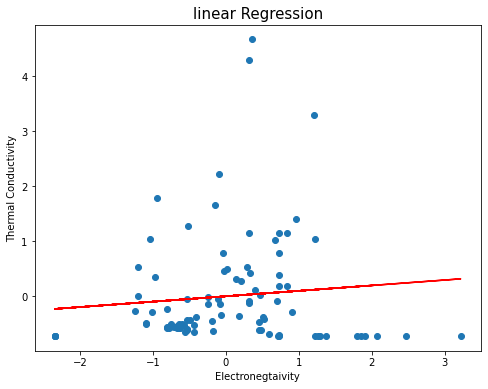

In [23]:
plt.subplots(1,1,figsize = (8,6))
plt.plot(X,y_predict, color = 'red')
plt.scatter(X,Y)
plt.xlabel('Electronegtaivity')
plt.ylabel('Thermal Conductivity')
plt.title('linear Regression', fontsize = 15)
#plt.vlines(X,Y,y_predict,label = 'MSE lines')
plt.show()

# Multi linear regression

# $y =\beta_{0}+\beta_{1}x_{1} +\beta_{2}x_{2}$

In [65]:
x = np.array(df.iloc[:,[2,5]])
y = np.array(df['Thermal Conductivity'])


In [66]:
#Standardizing the data of the x values 
x = (x-np.mean(x))/np.std(x)


In [67]:
model1 = LinearRegression().fit(x,y)

In [68]:
model1.fit(x,y)

LinearRegression()

In [69]:
r_square = model1.score(x,y)
print(r_square)

0.0396249822319662


In [70]:
print('Intercept: ',model1.intercept_)

Intercept:  35907.584479745325


In [71]:
print('Coefficients: ', model1.coef_)

Coefficients:  [5.32250710e+04 1.32677538e+01]


In [72]:
y_p = model1.intercept_ + model1.coef_[0]*x[:,0] + model1.coef_[1]*x[:,1]
y_p

array([44.70381739, 23.81575765, 34.37451007, 43.10053703, 48.72276218,
       53.37569984, 52.6820852 , 56.480379  , 61.60813953, 23.81746174,
       34.94116726, 40.37157531, 45.49210123, 47.36984049, 48.91622817,
       53.2108485 , 53.82608446, 23.81954452, 33.63640596, 36.97853636,
       43.804805  , 49.1823808 , 53.75277229, 56.5937531 , 56.11737073,
       59.81726884, 62.72980319, 63.01464328, 63.0617044 , 56.35679859,
       54.98845339, 55.49097707, 58.05178966, 59.36369617, 59.3039597 ,
       52.30821542, 35.45883962, 38.84693189, 45.97841079, 51.85109025,
       59.29025275, 68.51248263, 69.0733687 , 73.9808829 , 74.83512833,
       73.15250396, 66.99141182, 60.33411676, 58.01712907, 59.72616957,
       59.08960772, 58.52295053, 60.73946138, 48.51543626, 35.74203081,
       40.76238854, 48.81526937, 50.47257688, 50.56752357, 51.23050154,
       51.82192596, 52.72240808, 47.61095107, 53.90663101, 54.8775674 ,
       55.72988912, 56.41653506, 57.05557024, 57.74221617, 50.59

In [73]:
Y_predict = model1.predict(x)
print(Y_predict)

[44.70381739 23.81575765 34.37451007 43.10053703 48.72276218 53.37569984
 52.6820852  56.480379   61.60813953 23.81746174 34.94116726 40.37157531
 45.49210123 47.36984049 48.91622817 53.2108485  53.82608446 23.81954452
 33.63640596 36.97853636 43.804805   49.1823808  53.75277229 56.5937531
 56.11737073 59.81726884 62.72980319 63.01464328 63.0617044  56.35679859
 54.98845339 55.49097707 58.05178966 59.36369617 59.3039597  52.30821542
 35.45883962 38.84693189 45.97841079 51.85109025 59.29025275 68.51248263
 69.0733687  73.9808829  74.83512833 73.15250396 66.99141182 60.33411676
 58.01712907 59.72616957 59.08960772 58.52295053 60.73946138 48.51543626
 35.74203081 40.76238854 48.81526937 50.47257688 50.56752357 51.23050154
 51.82192596 52.72240808 47.61095107 53.90663101 54.8775674  55.72988912
 56.41653506 57.05557024 57.74221617 50.59036709 59.16284399 67.66046956
 77.46450532 92.02027285 91.65261179 98.19321589 97.7198565  96.23097293
 93.65830944 74.87476943 67.2432402  72.80105701 66.

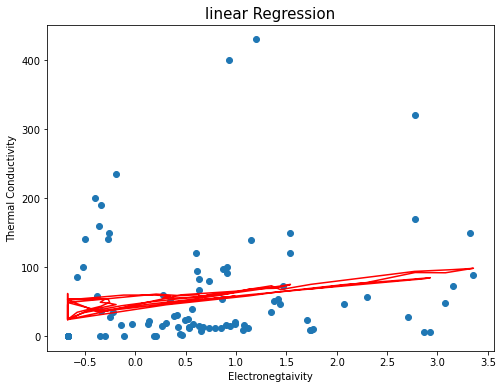

In [74]:
plt.subplots(1,1,figsize = (8,6))
plt.plot(x[:,1],Y_predict, color = 'red')
plt.scatter(x[:,1],y)
plt.xlabel('Electronegtaivity')
plt.ylabel('Thermal Conductivity')
plt.title('linear Regression', fontsize = 15)
#plt.vlines(X,Y,y_predict,label = 'MSE lines')
plt.show()

# Gradient Descent for the variable X and Y

We assume that

$y = \beta_{0}*x{0} + \beta_{1}*x1 +\beta_{2}*x2$    

where x{0} = 1

In [34]:
x = np.array(df.iloc[:,[2,5]])
y = np.array(df['Thermal Conductivity'])


In [35]:
#Standardizing the data of the x values 
x = (x-np.mean(x))/np.std(x)
y = (y-np.mean(y))/np.std(y)

In [36]:
def cost_function(x,y,theta):
    m = len(y)
    cost = (1/2*m)*np.sum(np.square(x.dot(theta)-y))
    return cost

In [37]:
#theta is the coefficient and alpha is the learning rate
def gradient_descent(x,y,theta,alpha,iteration):
    p_cost = [0]*iteration
    m = len(y)
    for i in range(iteration):
        #Hypothesis value
        h = x.dot(theta)
        #difference between predict and actual
        loss = h-y
        #Gradiant of loss function
        gradient = x.T.dot(loss)/m
        theta = theta - gradient*alpha 
        #New cost 
        cost = cost_function(x,y,theta)
        p_cost[i] = cost
    return theta, p_cost

In [38]:
x = np.c_[np.ones(len(x),dtype='int64'),x]
y = y[:]

In [60]:
theta = np.zeros(x.shape[1])
alpha = 0.001
iteration = 10000
new_theta, cost_history = gradient_descent(x,y,theta,alpha,iteration)
print('Intercept:   {:0.3f} \nTheta1:      {:0.3f} \nTheta2:      {:0.3f}'.format(new_theta[0],new_theta[1],new_theta[2]))

Intercept:   -0.080 
Theta1:      0.054 
Theta2:      0.172


Text(0.5, 1.0, 'Gradient descent for the x and Y data')

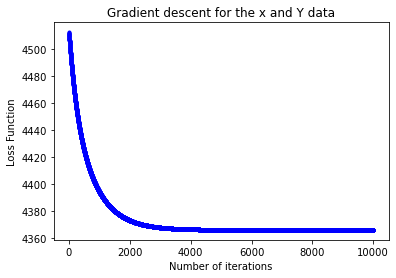

In [61]:
plt.plot(range(iteration),cost_history,'b.')
plt.xlabel('Number of iterations')
plt.ylabel('Loss Function')
plt.title('Gradient descent for the x and Y data')

In [62]:
print('Loss function for optimum learning:' ,cost_history[-1])
print('Differnece in loss function: ',cost_history[0]-cost_history[1])

Loss function for optimum learning: 4366.155490608954
Differnece in loss function:  0.31842951613725745


# There we can see that the loss function is large that shows that our data is highly biased 
